# IMPORTING ALL THE MODULES

In [114]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns

# IMPORTING THE CLEANED DATA

In [115]:
df = pd.read_csv("Cleaned_data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Others,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second or More,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [116]:
df.shape

(5177, 13)

CHECKING FOR THE NULL VALUES

In [117]:
df.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               26
Power                26
Seats                30
Price                 0
dtype: int64

In [118]:
df1 = df.dropna()

In [119]:
df1.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [120]:
df1.shape

(5147, 13)

CONVERTING THE MILEAGE COLUMN TO NUMBER ONLY FORMAT

In [121]:
df1["Mileage"] = df1["Mileage"].apply(lambda x:x.split(" ")[0])
df1["Mileage"].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     26.6
1    19.67
2     18.2
3    20.77
4     15.2
Name: Mileage, dtype: object

CONVERTING THE ENGINE COLUMN TO NUMBER ONLY FORMAT

In [122]:
df1["Engine"] = df1["Engine"].apply(lambda x:int(str(x).split(" ")[0]))
df1["Engine"].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     998
1    1582
2    1199
3    1248
4    1968
Name: Engine, dtype: int64

CONVERTING THE POWER COLUMN TO NUMBER ONLY FORMAT

In [123]:
df1["Power"] = df1["Power"].apply(lambda x:x.split(" ")[0]) 
df1["Power"].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    58.16
1    126.2
2     88.7
3    88.76
4    140.8
Name: Power, dtype: object

# FINAL DATA FRAME

In [124]:
df1.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Others,Manual,First,26.6,998,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second or More,15.2,1968,140.8,5.0,17.74


In [144]:
df2 = df1.drop("Unnamed: 0",axis = 1)
df_corr = df2.corr()

HEAT MAP TO CHECK FOR CORRELATIONS

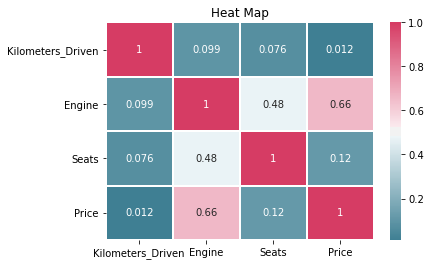

In [148]:
cmap = sns.diverging_palette(220,2,as_cmap = True)
map = sns.heatmap(df_corr, linewidth = 1.0,cmap = cmap, annot = True)
plt.title("Heat Map")
plt.show(map)

TOP LOCATIONS

Text(0.5, 1.0, 'Top Locations')

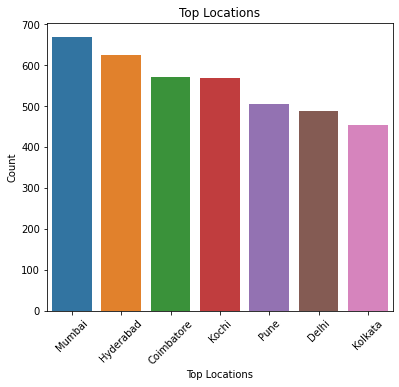

In [161]:
locations = df2["Location"].value_counts()[:7]
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,1])
locations_india = locations.index
freq = locations
chart = sns.barplot(x = locations_india,y = freq)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
sns.barplot(x = locations_india,y = freq)
plt.xlabel("Top Locations")
plt.ylabel("Count")
plt.title("Top Locations")

EXTRACTING BRANDS FROM MODEL NAMES

In [190]:
Brands = df2["Name"].apply(lambda x:x.split(" ")[0])
brand_counts = Brands.value_counts()[:10]
brand_counts

Maruti           1095
Hyundai           998
Honda             556
Toyota            361
Volkswagen        284
Mercedes-Benz     274
Ford              240
BMW               223
Audi              216
Mahindra          200
Name: Name, dtype: int64

TOP BRANDS

Text(0.5, 1.0, 'Top selling brands')

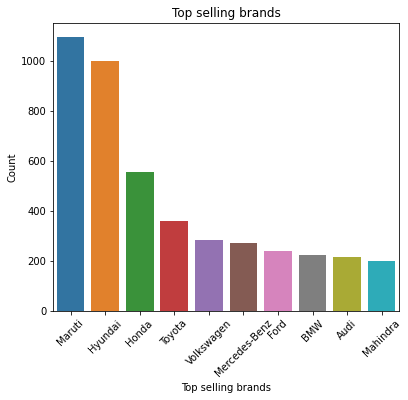

In [202]:
Brand_names = df2["Name"].apply(lambda x:x.split(" ")[0])
brands = Brand_names.value_counts()[:10]
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,1])
brand_count = brands.index
freq = brands
chart = sns.barplot(x = brand_count,y = freq)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
sns.barplot(x = brand_count,y = freq)
plt.xlabel("Top selling brands")
plt.ylabel("Count")
plt.title("Top selling brands")

TOP BRANDS

Text(0.5, 1.0, 'Top selling car models')

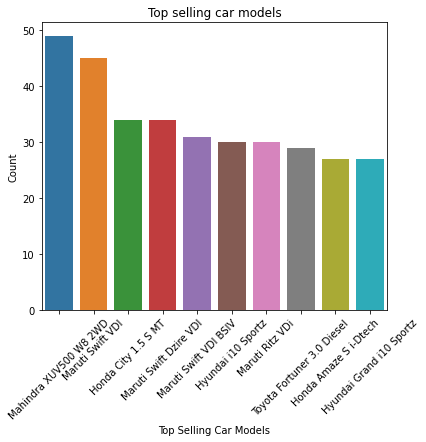

In [160]:
models = df2["Name"].value_counts()[:10]
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,1])
models_count = models.index
freq = models
chart = sns.barplot(x = models_count,y = freq)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
sns.barplot(x = models_count,y = freq)
plt.xlabel("Top Selling Car Models")
plt.ylabel("Count")
plt.title("Top selling car models")

TRANSMISSION TYPES

Text(0.5, 1.0, 'Transmission Count Distribution')

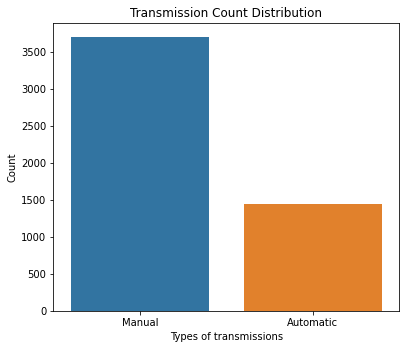

In [163]:
auto_manual = df2["Transmission"].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,1])
transmission = auto_manual.index
freq = auto_manual
chart = sns.barplot(x = transmission,y = freq)
chart.set_xticklabels(chart.get_xticklabels())
sns.barplot(x = transmission,y = freq)
plt.xlabel("Types of transmissions")
plt.ylabel("Count")
plt.title("Transmission Count Distribution")

DISTRIBUTION OF PRICES ACROSS VARIOUS MODELS OF CAR

Text(0.5, 1.0, 'Distribution of Prices')

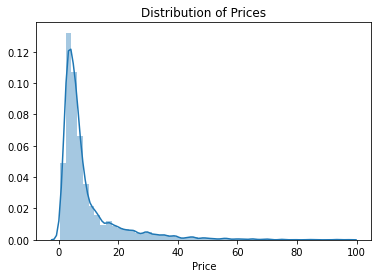

In [181]:
sns.distplot(df2["Price"])
plt.title("Distribution of Prices")

FUEL TYPES

Text(0.5, 1.0, 'Top used Fuel')

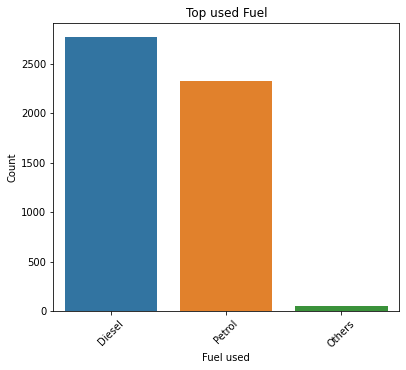

In [184]:
fuels = df2["Fuel_Type"].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,1])
fuels_count = fuels.index
freq = fuels
chart = sns.barplot(x = fuels_count,y = freq)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
sns.barplot(x = fuels_count,y = freq)
plt.xlabel("Fuel used")
plt.ylabel("Count")
plt.title("Top used Fuel")

Text(0.5, 1.0, 'Top used Fuel')

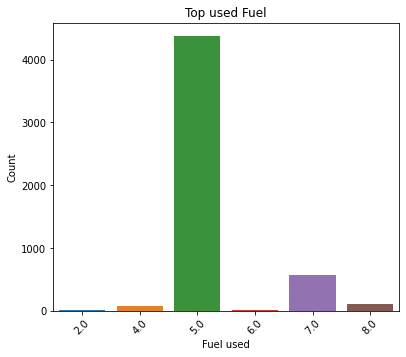

In [204]:
seats = df2["Seats"].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,1])
seat_count = seats.index
freq = seats
chart = sns.barplot(x = seat_count,y = freq)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
sns.barplot(x = seat_count,y = freq)
plt.xlabel("Fuel used")
plt.ylabel("Count")
plt.title("Top used Fuel")